In [1]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sns.set_style("whitegrid")

from drivers import *
from benchmarks import jobs


/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## OHIE benchmark results

In [2]:
benchmarks = [{
        'name': 'ohie',
        'path': 'data/OHIE/ohie_data.csv'
    },{
        'name': 'synthetic_1D_sinusoidal',
        'NS': 5000,
        'config': {
            'Y0_PDF': 'piecewise_sinusoid',
            'Y1_PDF': 'low_base_rate_sinusoid',
            'PI_PDF': 'linear'
            }
    },{
        'name': 'synthetic_2D_linsep',
        'NS': 5000,
        'config': {
            'Y0_PDF': '2D_linsep_baseline',
            'Y1_PDF': '2D_linsep_intervention',
            'PI_PDF': '6cov_linear'
        }
    },{
        'name': 'synthetic_6D_shalt',
        'NS': 5000,
        'config': {
            'Y0_PDF': 'shalt_6cov_baseline',
            'Y1_PDF': 'shalt_6cov_intervention',
            'PI_PDF': '6cov_linear'}
}]




In [3]:
param_configs = [{
    'alpha_0': 0.1,
    'alpha_1': 0.05,
    'beta_0': 0.2,
    'beta_1': 0.4 
}]


baselines = [{
    'model': 'OBS',
    'target': 'Y'
},{
    'model': 'COM',
    'target': 'Y'
},{
    'model': 'COM-SL',
    'target': 'Y'
},{
    'model': 'RW',
    'target': 'Y'
},{
    'model': 'RW-SL',
    'target': 'Y'
},{
    'model': 'Proxy Oracle',
    'target': f'Y'
},{
    'model': 'Target Oracle',
    'target': f'YS'
}]

syn1d = {
        'name': 'synthetic_1D_sinusoidal',
        'NS': 10000,
        'config': {
            'Y0_PDF': 'piecewise_sinusoid',
            'Y1_PDF': 'low_base_rate_sinusoid',
            'PI_PDF': 'linear'
        }
    }

ohie = {
    'name': 'ohie',
    'path': 'data/OHIE/ohie_data.csv'
}

jobs = {
    'name': 'jobs',
    'train_path': 'data/JOBS/jobs_DW_bin.new.10.train.npz',
    'test_path': 'data/JOBS/jobs_DW_bin.new.10.test.npz',
}

exp_config = {
    'benchmark': jobs,
    'policy_gamma': 0
}

# We need a high-level experimental configuration paramter that manipulates: 
# - Selection bias (either statically or dynamically).
# - Data partitioning scheme
# - Policy risk parameter

po_benchmark, te_benchmark = run_risk_minimization_exp(exp_config, baselines,
                                              param_configs, N_RUNS=1, n_epochs=20)

RUN: 0, model: OBS, alpha_0: 0.1, alpha_1: 0.05, beta_0: 0.2, beta_1: 0.4



Target: Y: 100%|████████████████████████████████| 20/20 [00:13<00:00,  1.52it/s]


RUN: 0, model: COM, alpha_0: 0.1, alpha_1: 0.05, beta_0: 0.2, beta_1: 0.4



Target: Y: 100%|████████████████████████████████| 20/20 [00:11<00:00,  1.75it/s]


RUN: 0, model: COM-SL, alpha_0: 0.1, alpha_1: 0.05, beta_0: 0.2, beta_1: 0.4



Target: Y: 100%|████████████████████████████████| 20/20 [00:11<00:00,  1.68it/s]


RUN: 0, model: RW, alpha_0: 0.1, alpha_1: 0.05, beta_0: 0.2, beta_1: 0.4



Target: Y: 100%|████████████████████████████████| 20/20 [00:11<00:00,  1.71it/s]


RUN: 0, model: RW-SL, alpha_0: 0.1, alpha_1: 0.05, beta_0: 0.2, beta_1: 0.4



Target: Y: 100%|████████████████████████████████| 20/20 [00:11<00:00,  1.72it/s]


RUN: 0, model: Proxy Oracle, alpha_0: 0.1, alpha_1: 0.05, beta_0: 0.2, beta_1: 0.4



Target: Y_1: 100%|██████████████████████████████| 20/20 [00:11<00:00,  1.73it/s]


RUN: 0, model: Target Oracle, alpha_0: 0.1, alpha_1: 0.05, beta_0: 0.2, beta_1: 0.4



Target: YS_1: 100%|█████████████████████████████| 20/20 [00:12<00:00,  1.59it/s]


In [4]:
te_benchmark

,alpha_0,alpha_1,beta_0,beta_1,model,ate,ate_hat,ate_error,policy_risk
0,0.1,0.05,0.2,0.4,OBS,0.07794,0.039637,0.038303,0.062842
1,0.1,0.05,0.2,0.4,COM,0.07794,-0.137037,0.214977,0.048044
2,0.1,0.05,0.2,0.4,COM-SL,0.07794,0.007882,0.070058,0.067077
3,0.1,0.05,0.2,0.4,RW,0.07794,-0.139750,0.217690,0.050666
4,0.1,0.05,0.2,0.4,RW-SL,0.07794,-0.055239,0.133179,0.065085
5,0.1,0.05,0.2,0.4,Proxy Oracle,0.07794,-0.103979,0.181919,0.052633
6,0.1,0.05,0.2,0.4,Target Oracle,0.07794,-0.108497,0.186437,0.057849


In [3]:

param_configs = [{
    'alpha_0': 0,
    'alpha_1': 0,
    'beta_0': 0,
    'beta_1': 0
}]
jobs_config = {
    'name': 'jobs',
    'train_path': 'data/JOBS/jobs_DW_bin.new.10.train.npz',
    'test_path': 'data/JOBS/jobs_DW_bin.new.10.test.npz',
}

X, Y = jobs.generate_jobs_data(jobs_config, param_configs[0], shuffle=True)
    
    
    

In [6]:
# Y['Y_1'][Y['D'] == 1].mean() 

Y['Y_0'][Y['D'] == 0].mean()

0.8576329331046312

In [8]:
Y['Y_1'][Y['D'] == 1].sum()

67.0

In [10]:
Y['Y_0'][Y['D'] == 0].sum()

415.0

In [19]:
Y['Y_0'][Y['D'] == 0].mean()

0.8576329331046312

In [14]:
Y['YS_1'][Y['D'] == 1].mean()

0.7744107744107744

In [15]:
Y['YS_0'][Y['D'] == 0].mean()

0.8576329331046312

In [20]:
Y.mean()

print(Y['YS_1'][Y['D'] == 1].mean() - Y['YS_0'][Y['D'] == 0].mean())
print(Y['Y_1'][Y['D'] == 1].mean() - Y['Y_0'][Y['D'] == 0].mean())



-0.08322215869385674
-0.08322215869385674


In [30]:
print(Y['Y_0'][Y['D'] == 0 ].mean())

0.0


In [11]:
po_benchmark[(po_benchmark['do'] == 0) & (po_benchmark['sample'] == 'in-sample')]

,do,model,alpha_0,alpha_1,beta_0,beta_1,AU-ROC,ACC,sample
0,0,OBS,0.1,0.05,0.2,0.4,0.679203,0.682571,in-sample
4,0,COM,0.1,0.05,0.2,0.4,0.645239,0.659347,in-sample
8,0,COM-SL,0.1,0.05,0.2,0.4,0.678811,0.645833,in-sample
12,0,RW,0.1,0.05,0.2,0.4,0.638949,0.599662,in-sample
16,0,RW-SL,0.1,0.05,0.2,0.4,0.660581,0.557995,in-sample
20,0,Proxy Oracle,0.1,0.05,0.2,0.4,0.715481,0.644144,in-sample
24,0,Target Oracle,0.1,0.05,0.2,0.4,0.842527,0.774775,in-sample


In [13]:
# This is for accuracy of models predicting potential outcomes on held-out data
po_benchmark[(po_benchmark['do'] == 0) & (po_benchmark['sample'] == 'out-sample')]

,do,model,alpha_0,alpha_1,beta_0,beta_1,AU-ROC,ACC,sample
1,0,OBS,0.3,0.1,0.1,0.3,0.414866,0.935261,out-sample
5,0,COM,0.3,0.1,0.1,0.3,0.496931,0.909366,out-sample
9,0,COM-SL,0.3,0.1,0.1,0.3,0.706481,0.930945,out-sample
13,0,RW,0.3,0.1,0.1,0.3,0.502712,0.936556,out-sample
17,0,RW-SL,0.3,0.1,0.1,0.3,0.701279,0.930082,out-sample
21,0,Proxy Oracle,0.3,0.1,0.1,0.3,0.528180,0.914113,out-sample
25,0,Target Oracle,0.3,0.1,0.1,0.3,0.969201,0.940872,out-sample


In [6]:
syn1d = {
    'name': 'synthetic_1D_sinusoidal',
    'NS': 10000,
    'config': {
        'Y0_PDF': 'piecewise_sinusoid',
        'Y1_PDF': 'low_base_rate_sinusoid',
        'PI_PDF': 'linear'
        }
}
ohie = {
    'name': 'ohie',
    'path': 'data/OHIE/ohie_data.csv'
}

param_configs = [{
    'alpha_0': 0,
    'alpha_1': 0,
    'beta_0': 0,
    'beta_1': 0 
}]


X, Y = load_dataset(ohie, param_configs[0])


data = Y

In [8]:
X.shape

(7723, 58)

In [35]:
Y_0[D==1].mean()

0.010904044409199048

In [34]:
Y_0[D==0].mean()

0.010895883777239709

In [5]:
po_benchmark[(po_benchmark['do'] == 0) & (po_benchmark['sample'] == 'out-sample') ]

,do,model,alpha_0,alpha_1,beta_0,beta_1,AU-ROC,ACC,sample
1,0,OBS,0.3,0.1,0.1,0.3,0.500000,0.502667,out-sample
5,0,COM,0.3,0.1,0.1,0.3,0.381048,0.502667,out-sample
9,0,COM-SL,0.3,0.1,0.1,0.3,0.430173,0.502667,out-sample
13,0,RW,0.3,0.1,0.1,0.3,0.381048,0.502667,out-sample
17,0,RW-SL,0.3,0.1,0.1,0.3,0.395314,0.502667,out-sample
21,0,Proxy Oracle,0.3,0.1,0.1,0.3,0.382958,0.502667,out-sample
25,0,Target Oracle,0.3,0.1,0.1,0.3,0.840992,0.770667,out-sample


In [3]:
po_results = []
te_results = []

for benchmark in benchmarks:

    po_benchmark, te_benchmark = run_baseline_comparison_exp(benchmark, baselines,
                                              param_configs, N_RUNS=1, n_epochs=2)
    po_benchmark['benchmark'] = benchmark['name']
    te_benchmark['benchmark'] = benchmark['name']
    
    po_results.append(po_benchmark)
    te_results.append(te_benchmark)

RUN: 0, model: OBS, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.14it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.33it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.52it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.50it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.47it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.50it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.44it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0.05



Target: Y_0: 100%|████████████████████████████████| 2/2 [00:01<00:00,  1.53it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y_1: 100%|████████████████████████████████| 2/2 [00:01<00:00,  1.50it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0.05



Target: YS_0: 100%|███████████████████████████████| 2/2 [00:01<00:00,  1.51it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_1: 100%|███████████████████████████████| 2/2 [00:01<00:00,  1.53it/s]
/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_12495/575684727.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  te_benchmark.append(te_benchmark)


RUN: 0, model: OBS, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.47it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.61it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.61it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.59it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.59it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.55it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0.05



Target: Y_0: 100%|████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y_1: 100%|████████████████████████████████| 2/2 [00:01<00:00,  1.44it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0.05



Target: YS_0: 100%|███████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_1: 100%|███████████████████████████████| 2/2 [00:01<00:00,  1.45it/s]
/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_12495/575684727.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  te_benchmark.append(te_benchmark)


RUN: 0, model: OBS, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.13it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.33it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.19it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.41it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.11it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.40it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.41it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.42it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0.05



Target: Y_0: 100%|████████████████████████████████| 2/2 [00:01<00:00,  1.44it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y_1: 100%|████████████████████████████████| 2/2 [00:01<00:00,  1.53it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0.05



Target: YS_0: 100%|███████████████████████████████| 2/2 [00:01<00:00,  1.51it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_1: 100%|███████████████████████████████| 2/2 [00:01<00:00,  1.59it/s]
/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_12495/575684727.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  te_benchmark.append(te_benchmark)


RUN: 0, model: OBS, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.42it/s]


RUN: 0, model: OBS, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.39it/s]


RUN: 0, model: COM, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.52it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.52it/s]


RUN: 0, model: COM-SL, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


RUN: 0, model: RW, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.53it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.55it/s]


RUN: 0, model: RW-SL, alpha: 0.4, beta: 0.05



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.50it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y: 100%|██████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.4, beta: 0.05



Target: Y_0: 100%|████████████████████████████████| 2/2 [00:01<00:00,  1.55it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y_1: 100%|████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]


RUN: 0, model: Target Oracle, alpha: 0.4, beta: 0.05



Target: YS_0: 100%|███████████████████████████████| 2/2 [00:01<00:00,  1.48it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_1: 100%|███████████████████████████████| 2/2 [00:01<00:00,  1.61it/s]
/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_12495/575684727.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  te_benchmark.append(te_benchmark)


In [7]:
exp_results.groupby('model').mean()

,AU-ROC,ACC,alpha,beta
model,,,,
COM,0.430305,0.844368,0.4,0.05
COM-SL,0.577458,0.920328,0.4,0.05
OBS,0.464579,0.910229,0.4,0.05
Proxy Oracle,0.449358,0.815969,0.4,0.05
RW,0.464566,0.834182,0.4,0.05
RW-SL,0.599224,0.923435,0.4,0.05
Target Oracle,0.963082,0.931463,0.4,0.05


In [4]:
X_syn, Y_syn = generate_syn_data(env, error_params, NS=5000, shuffle=True)
X_ohie, Y_ohie = generate_ohie_data(OHIE_PATH, error_params, shuffle=True)

syn_train_loader, syn_val_loader = get_loaders(X_syn, Y_syn, target='Y', do=0, conditional=True)
ohie_train_loader, ohie_val_loader = get_loaders(X_ohie, Y_ohie, target='Y', do=0, conditional=True)

loss_config = {
    'alpha': None,
    'beta':  None,
    'prop_func': pi,
    'pi_pdf': env['PI_PDF'],
    'do': 0,
    'reweight': False
}



model = MLP(n_feats=X_ohie.shape[1])
losses = train(model, 'Y', ohie_train_loader, loss_config=loss_config, n_epochs=10)


NameError: name 'generate_syn_data' is not defined

## Experiment: comparison among baselines

In [3]:
####################
## Experiment setup 
####################

do=0
N_RUNS=4
NS=10000
n_epochs=20
baselines = [{
    'model': 'OBS',
    'target': 'Y'
},{
    'model': 'COM',
    'target': 'Y'
},{
    'model': 'COM-SL',
    'target': 'Y'
},{
    'model': 'RW',
    'target': 'Y'
},{
    'model': 'RW-SL',
    'target': 'Y'
},{
    'model': 'Proxy Oracle',
    'target': f'Y0_{do}'
},{
    'model': 'Target Oracle',
    'target': f'YS_{do}'
}]

# param_configs = []
# for alpha in [0, .1, .2, .3]:
#     for beta in [0, .1, .2, .3]:
#         param_configs.append({
#             'alpha': alpha,
#             'beta': beta
#         })

param_configs = [{
    'alpha': .1,
    'beta': .3
},{
    'alpha': .2,
    'beta': .2
},{
    'alpha': .3,
    'beta': .1
}]

benchmark_config = {
    'NS': 5000,
    'Y0_PDF': 'piecewise_sinusoid',
    'Y1_PDF': 'low_base_rate_sinusoid',
    'PI_PDF': 'linear'
}

linsep_results = run_baseline_comparison_exp_grid(
    linsep,
    baselines,
    param_configs,
    do=do,
    N_RUNS=N_RUNS,
    NS=NS,
    K=1,
    n_epochs=n_epochs
)

RUN: 0, model: OBS, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.04it/s]


RUN: 0, model: COM, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.21it/s]


RUN: 0, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]


RUN: 0, model: RW, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]


RUN: 0, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]


RUN: 0, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.11it/s]


RUN: 0, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]


RUN: 1, model: OBS, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.00s/it]


RUN: 1, model: COM, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


RUN: 1, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]


RUN: 1, model: RW, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]


RUN: 1, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.07it/s]


RUN: 1, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


RUN: 1, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.18it/s]


RUN: 2, model: OBS, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


RUN: 2, model: COM, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]


RUN: 2, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.02it/s]


RUN: 2, model: RW, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.06it/s]


RUN: 2, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.01it/s]


RUN: 2, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]


RUN: 2, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]


RUN: 3, model: OBS, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:23<00:00,  1.17s/it]


RUN: 3, model: COM, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


RUN: 3, model: COM-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]


RUN: 3, model: RW, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.11it/s]


RUN: 3, model: RW-SL, alpha: 0.1, beta: 0.3



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.02it/s]


RUN: 3, model: Proxy Oracle, alpha: 0.1, beta: 0.3



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


RUN: 3, model: Target Oracle, alpha: 0.1, beta: 0.3



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:19<00:00,  1.02it/s]


RUN: 0, model: OBS, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:21<00:00,  1.09s/it]


RUN: 0, model: COM, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


RUN: 0, model: COM-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.01it/s]


RUN: 0, model: RW, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.01it/s]


RUN: 0, model: RW-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]


RUN: 0, model: Proxy Oracle, alpha: 0.2, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:19<00:00,  1.04it/s]


RUN: 0, model: Target Oracle, alpha: 0.2, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:21<00:00,  1.05s/it]


RUN: 1, model: OBS, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:24<00:00,  1.20s/it]


RUN: 1, model: COM, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:21<00:00,  1.06s/it]


RUN: 1, model: COM-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]


RUN: 1, model: RW, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]


RUN: 1, model: RW-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:21<00:00,  1.08s/it]


RUN: 1, model: Proxy Oracle, alpha: 0.2, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:19<00:00,  1.02it/s]


RUN: 1, model: Target Oracle, alpha: 0.2, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]


RUN: 2, model: OBS, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.00s/it]


RUN: 2, model: COM, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]


RUN: 2, model: COM-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


RUN: 2, model: RW, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.01it/s]


RUN: 2, model: RW-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:22<00:00,  1.10s/it]


RUN: 2, model: Proxy Oracle, alpha: 0.2, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:24<00:00,  1.24s/it]


RUN: 2, model: Target Oracle, alpha: 0.2, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:26<00:00,  1.31s/it]


RUN: 3, model: OBS, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:35<00:00,  1.80s/it]


RUN: 3, model: COM, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:36<00:00,  1.81s/it]


RUN: 3, model: COM-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:32<00:00,  1.62s/it]


RUN: 3, model: RW, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:22<00:00,  1.11s/it]


RUN: 3, model: RW-SL, alpha: 0.2, beta: 0.2



Target: Y0: 100%|███████████████████████████████| 20/20 [00:22<00:00,  1.14s/it]


RUN: 3, model: Proxy Oracle, alpha: 0.2, beta: 0.2



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]


RUN: 3, model: Target Oracle, alpha: 0.2, beta: 0.2



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]


RUN: 0, model: OBS, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:24<00:00,  1.21s/it]


RUN: 0, model: COM, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:21<00:00,  1.07s/it]


RUN: 0, model: COM-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:23<00:00,  1.15s/it]


RUN: 0, model: RW, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:21<00:00,  1.09s/it]


RUN: 0, model: RW-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:23<00:00,  1.16s/it]


RUN: 0, model: Proxy Oracle, alpha: 0.3, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]


RUN: 0, model: Target Oracle, alpha: 0.3, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:19<00:00,  1.00it/s]


RUN: 1, model: OBS, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:23<00:00,  1.17s/it]


RUN: 1, model: COM, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:21<00:00,  1.09s/it]


RUN: 1, model: COM-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.05s/it]


RUN: 1, model: RW, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.01it/s]


RUN: 1, model: RW-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]


RUN: 1, model: Proxy Oracle, alpha: 0.3, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:20<00:00,  1.05s/it]


RUN: 1, model: Target Oracle, alpha: 0.3, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:22<00:00,  1.10s/it]


RUN: 2, model: OBS, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:25<00:00,  1.26s/it]


RUN: 2, model: COM, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


RUN: 2, model: COM-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]


RUN: 2, model: RW, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:21<00:00,  1.08s/it]


RUN: 2, model: RW-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:21<00:00,  1.06s/it]


RUN: 2, model: Proxy Oracle, alpha: 0.3, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:20<00:00,  1.00s/it]


RUN: 2, model: Target Oracle, alpha: 0.3, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:19<00:00,  1.04it/s]


RUN: 3, model: OBS, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:22<00:00,  1.15s/it]


RUN: 3, model: COM, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


RUN: 3, model: COM-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:22<00:00,  1.13s/it]


RUN: 3, model: RW, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:20<00:00,  1.04s/it]


RUN: 3, model: RW-SL, alpha: 0.3, beta: 0.1



Target: Y0: 100%|███████████████████████████████| 20/20 [00:19<00:00,  1.02it/s]


RUN: 3, model: Proxy Oracle, alpha: 0.3, beta: 0.1



Target: Y0_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.11it/s]


RUN: 3, model: Target Oracle, alpha: 0.3, beta: 0.1



Target: YS_0: 100%|█████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]


In [6]:
pd.DataFrame(linsep_results).to_csv('1D_eval_reweight_N_10000_RUNS_4.csv', index=False)

In [5]:
results = pd.DataFrame(linsep_results)
for config in param_configs:
    res = results[(results['alpha'] == config['alpha']) & (results['beta'] == config['beta'])].groupby('model').mean()
    display(res)
    sem = results[(results['alpha'] == config['alpha']) & (results['beta'] == config['beta'])].groupby('model').sem()
    display(sem)
        

,AU-ROC,ACC,alpha,beta
model,,,,
COM,0.654449,0.552000,0.1,0.3
COM-SL,0.829310,0.756833,0.1,0.3
OBS,0.574068,0.537083,0.1,0.3
Proxy Oracle,0.716077,0.600167,0.1,0.3
RW,0.805002,0.604667,0.1,0.3
RW-SL,0.762899,0.692000,0.1,0.3
Target Oracle,0.835340,0.760750,0.1,0.3


,AU-ROC,ACC,alpha,beta
model,,,,
COM,0.052535,0.032006,0.0,0.0
COM-SL,0.004954,0.007235,0.0,0.0
OBS,0.024095,0.016541,0.0,0.0
Proxy Oracle,0.078047,0.045540,0.0,0.0
RW,0.017606,0.043022,0.0,0.0
RW-SL,0.024605,0.034890,0.0,0.0
Target Oracle,0.007809,0.007253,0.0,0.0


,AU-ROC,ACC,alpha,beta
model,,,,
COM,0.674729,0.624750,0.2,0.2
COM-SL,0.771032,0.670167,0.2,0.2
OBS,0.597326,0.512500,0.2,0.2
Proxy Oracle,0.809837,0.715500,0.2,0.2
RW,0.726281,0.684333,0.2,0.2
RW-SL,0.736895,0.665583,0.2,0.2
Target Oracle,0.776499,0.724583,0.2,0.2


,AU-ROC,ACC,alpha,beta
model,,,,
COM,0.060948,0.045975,0.0,0.0
COM-SL,0.010034,0.027710,0.0,0.0
OBS,0.009775,0.024327,0.0,0.0
Proxy Oracle,0.024903,0.022518,0.0,0.0
RW,0.043003,0.030583,0.0,0.0
RW-SL,0.017346,0.017390,0.0,0.0
Target Oracle,0.040197,0.023865,0.0,0.0


,AU-ROC,ACC,alpha,beta
model,,,,
COM,0.794853,0.621417,0.3,0.1
COM-SL,0.679347,0.630250,0.3,0.1
OBS,0.575016,0.571583,0.3,0.1
Proxy Oracle,0.773523,0.634583,0.3,0.1
RW,0.800117,0.613667,0.3,0.1
RW-SL,0.794232,0.717000,0.3,0.1
Target Oracle,0.820204,0.758250,0.3,0.1


,AU-ROC,ACC,alpha,beta
model,,,,
COM,0.022388,0.018404,0.0,0.0
COM-SL,0.068663,0.053915,0.0,0.0
OBS,0.020128,0.025528,0.0,0.0
Proxy Oracle,0.036878,0.028821,0.0,0.0
RW,0.022207,0.044873,0.0,0.0
RW-SL,0.032729,0.021936,0.0,0.0
Target Oracle,0.024866,0.009960,0.0,0.0


## Fixing a single alpha, beta

In [15]:
do=0

env = {
    'Y0_PDF': '2D_linsep_intervention',
    'Y1_PDF': '2D_linsep_baseline',
    'PI_PDF': '6cov_linear'
}

baselines = [{
         'model': 'RW',
         'target': 'Y0'
    },{
        'model': 'RW-SL',
        'target': 'Y0'
    },{
         'model': 'OBS',
         'target': f'Y0'
    },{
         'model': 'Proxy Oracle',
         'target': f'Y0_0'
    },{
         'model': 'Target Oracle',
         'target': f'YS_0'
    },{
        'model': 'COM',
        'target': 'Y0'
    },{
        'model': 'COM-SL',
        'target': 'Y0'
}]

# baselines = [{
#          'model': 'OBS',
#          'target': f'Y0'
#     },{
#          'model': 'Proxy Oracle',
#          'target': f'Y0_0'
#     },{
#          'model': 'Target Oracle',
#          'target': f'YS_0'
#     }]
exp_results = run_baseline_comparison_exp(env, baselines, do=0, N_RUNS=5, NS=4000,
                                          K=1, n_epochs=10, alpha=.3, beta=.1)
    

=============== RUN: 0 ===============


Target: Y0: 100%|███████████████████████████████| 10/10 [00:06<00:00,  1.56it/s]


=============== RUN: 1 ===============


Target: Y0: 100%|███████████████████████████████| 10/10 [00:06<00:00,  1.49it/s]


=============== RUN: 2 ===============


Target: Y0: 100%|███████████████████████████████| 10/10 [00:07<00:00,  1.34it/s]


=============== RUN: 3 ===============


Target: Y0: 100%|███████████████████████████████| 10/10 [00:06<00:00,  1.46it/s]


=============== RUN: 4 ===============


Target: Y0: 100%|███████████████████████████████| 10/10 [00:06<00:00,  1.44it/s]


In [12]:
pd.DataFrame(exp_results).groupby('model').mean()

NameError: name 'exp_results' is not defined

# Main Experiment: parameter estimation via 

In [3]:
SAMPLE_SIZES = [2000, 4000, 6000, 8000, 10000]
env = {
    'Y0_PDF': '2D_linsep_intervention',
    'Y1_PDF': '2D_linsep_baseline',
    'PI_PDF': '6cov_linsep'
}
configs=[{
    'alpha': .1,
    'beta': .3
},{
    'alpha': .2,
    'beta': .2
},{
    'alpha': .3,
    'beta': .1
}]
ccperesults = ccpe_benchmark_exp(env, configs, SAMPLE_SIZES, N_RUNS=15, n_epochs=20)

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.1, beta: 0.3



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.1, beta: 0.3



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.43it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.43it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.1, beta: 0.3



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.1, beta: 0.3



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.31it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.33it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.33it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.1, beta: 0.3



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:16<00:00,  1.18it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.26it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.25it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.26it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.2, beta: 0.2



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.2, beta: 0.2



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.36it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.43it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.2, beta: 0.2



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.38it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.54it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.52it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.52it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.2, beta: 0.2



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.47it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.47it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.47it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.2, beta: 0.2



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.3, beta: 0.1



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:11<00:00,  1.67it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.66it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.64it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:11<00:00,  1.69it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:11<00:00,  1.67it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:11<00:00,  1.69it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:11<00:00,  1.68it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:11<00:00,  1.69it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:11<00:00,  1.70it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.67it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.64it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.64it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.3, beta: 0.1



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.62it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.62it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.62it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.61it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.61it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.64it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.63it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.63it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.62it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.61it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.63it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.57it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.3, beta: 0.1



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.57it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.58it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.57it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.57it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.57it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.58it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.56it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.57it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.57it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.58it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.56it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:12<00:00,  1.58it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.3, beta: 0.1



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.51it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.52it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]
Target: Y|D: 100%|██████████

NS: [2000, 4000, 6000, 8000, 10000], alpha: 0.3, beta: 0.1



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:13<00:00,  1.46it/s]
Target: Y|D: 100%|██████████

In [1]:
# pd.DataFrame(ccperesults).to_csv('ccpe_N_15_epochs_20.csv')

pd.DataFrame(ccperesults).groupby(['alpha','beta', 'NS']).mean()





NameError: name 'pd' is not defined

In [5]:


pd.DataFrame(ccperesults).groupby(['alpha','beta', 'NS']).mean()

alpha_hat  beta_hat  alpha_error  beta_error
alpha beta NS                                                 
0.1   0.3  2000    0.065296  0.276600    -0.034704   -0.023400
           4000    0.099370  0.272703    -0.000630   -0.027297
           6000    0.044988  0.241954    -0.055012   -0.058046
           8000    0.097976  0.266119    -0.002024   -0.033881
           10000   0.122831  0.291706     0.022831   -0.008294
0.2   0.2  2000    0.110799  0.170377    -0.089201   -0.029623
           4000    0.133155  0.121868    -0.066845   -0.078132
           6000    0.143153  0.141268    -0.056847   -0.058732
           8000    0.135842  0.149954    -0.064158   -0.050046
           10000   0.109112  0.187827    -0.090888   -0.012173
0.3   0.1  2000    0.229391  0.073485    -0.070609   -0.026515
           4000    0.163392  0.038593    -0.136608   -0.061407
           6000    0.230170  0.074851    -0.069830   -0.025149
           8000    0.215946  0.076836    -0.084054   -0.023164
           10000   0.238434  0.021176    -0.061566   -0.078824

In [10]:
pd.DataFrame(ccperesults).groupby('NS').mean()

,alpha,beta,alpha_hat,beta_hat,alpha_error,beta_error
NS,,,,,,
10000,0.2,0.2,0.223990,0.220720,0.023990,0.020720
20000,0.2,0.2,0.168013,0.252069,-0.031987,0.052069


In [7]:
pd.DataFrame(ccperesults).groupby('NS').mean()

,alpha,beta,alpha_hat,beta_hat,alpha_error,beta_error
NS,,,,,,
1000,0.2,0.2,0.216135,0.215559,0.016135,0.015559
2000,0.2,0.2,0.239689,0.253541,0.039689,0.053541
3000,0.2,0.2,0.067628,0.151977,-0.132372,-0.048023
4000,0.2,0.2,0.148458,0.226702,-0.051542,0.026702
5000,0.2,0.2,0.078935,0.118839,-0.121065,-0.081161


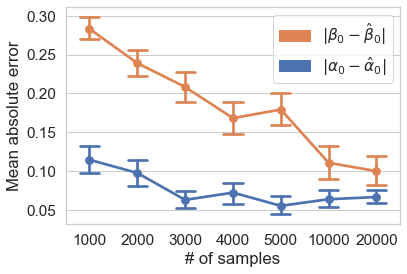

In [57]:
result_df = pd.read_csv('results/R7_K=1_N_RUNS=150_n_epochs=30_d0.csv')
result_df = result_df[result_df['aggregate'] == False]

sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid", 
              palette=sns.color_palette(), 
              font_scale=1.4)

g = sns.pointplot(
    data=result_df,
    x='NS',
    y='error',
    hue='parameter',
    capsize=.4,
    legend=True,
    errorbar="se"
)
g.set(xlabel='# of samples', ylabel='Mean absolute error')
black_patch = mpatches.Patch(color=sns.color_palette()[1], label=r'$|\beta_0 - \hat{\beta}_0|$')
red_patch = mpatches.Patch(color=sns.color_palette()[0], label=r'$|\alpha_0 - \hat{\alpha}_0|$')

plt.legend(handles=[black_patch, red_patch])

plt.savefig('figs/estimation_error.png', dpi=500, bbox_inches='tight')


## Experiment: Robustness to parameter estimation Error

In [5]:
params = np.array([0, .2, .4])
errors = np.array([-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2])
configs = []

for param in params: 
    for error in errors:
        estimate = round(param+error, 2)
        if estimate>=0 and estimate<=.5:
            configs.append({
                'param': param,
                'estimate': estimate
            })

exp_results = run_estimation_error_exp(do=0, param_configs=configs, error_param='alpha',
                                       NS=5000, N_RUNS=1, n_epochs=5, train_ratio=.7)

surroate params {'alpha': 0.0, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.39it/s]


surroate params {'alpha': 0.05, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]


surroate params {'alpha': 0.1, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.24it/s]


surroate params {'alpha': 0.15, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.07s/it]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.30it/s]


surroate params {'alpha': 0.0, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.05s/it]


surroate params {'alpha': 0.05, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.24it/s]


surroate params {'alpha': 0.1, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.06it/s]


surroate params {'alpha': 0.15, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.29it/s]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]


surroate params {'alpha': 0.25, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


surroate params {'alpha': 0.3, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.38it/s]


surroate params {'alpha': 0.35, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.40it/s]


surroate params {'alpha': 0.4, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.42it/s]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]


surroate params {'alpha': 0.25, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.27it/s]


surroate params {'alpha': 0.3, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


surroate params {'alpha': 0.35, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.33it/s]


surroate params {'alpha': 0.4, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]


surroate params {'alpha': 0.45, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]


surroate params {'alpha': 0.5, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.48it/s]


## Experiment 3 - Robustness plots 

In [2]:
alpha_robustness_results = pd.read_csv('results/alpha_stress_tests.csv')
beta_robustness_results = pd.read_csv('results/beta_stress_tests.csv')
# beta_robustness_results['parameter'] = 'beta'
alpha_robustness_results['bias'] = (alpha_robustness_results['alpha_hat'] - alpha_robustness_results['alpha']).round(decimals=2)
beta_robustness_results['bias'] = (beta_robustness_results['beta_hat'] - beta_robustness_results['beta']).round(decimals=2)
robustness_results = pd.concat([alpha_robustness_results, beta_robustness_results])

alpha_robustness_results = alpha_robustness_results[alpha_robustness_results['alpha'] > 0]
beta_robustness_results = beta_robustness_results[beta_robustness_results['beta'] > 0]



<Figure size 720x360 with 0 Axes>

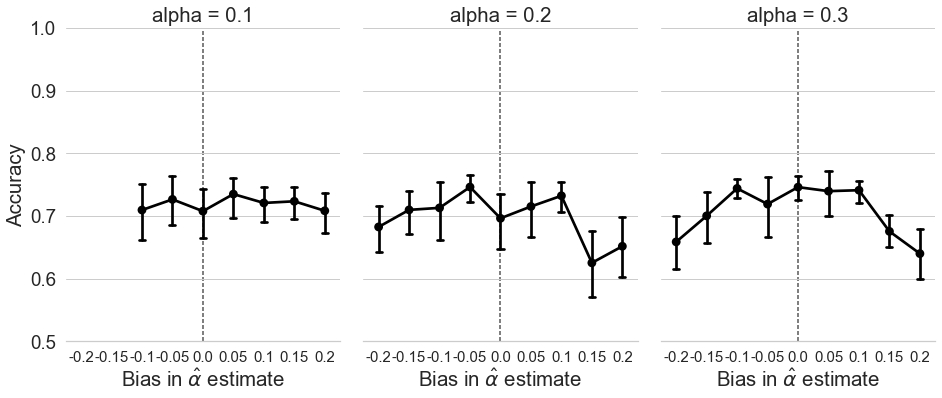

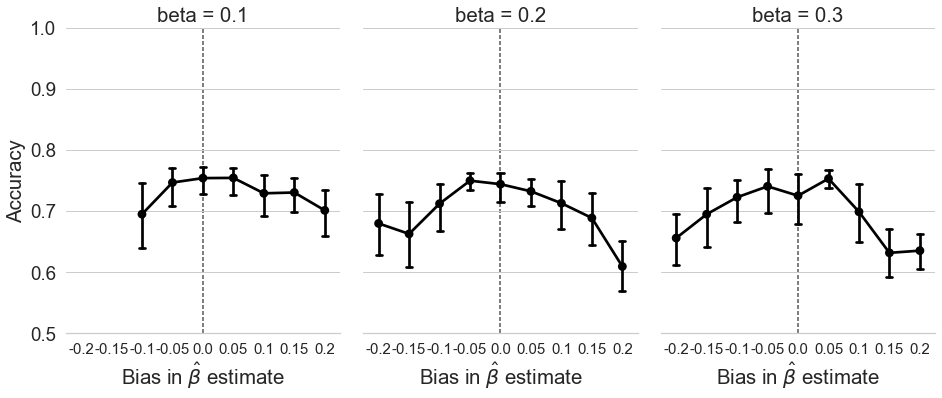

In [35]:
import matplotlib.ticker as tkr
sns.set_theme(style="whitegrid", 
              palette=sns.color_palette(), 
              font_scale=1.7)

# Draw a pointplot to show pulse as a function of three categorical factors
plt.figure(figsize=(10,5))
g = sns.catplot(
    data=alpha_robustness_results, x="bias", y="ACC",  col="alpha",  capsize=.2, 
    kind="point", height=6, aspect=.75, color="black"
)
g.despine(left=True)
g.set(ylim=(.5, 1), ylabel='Accuracy', xlabel=r'Bias in $\hat{\alpha}$ estimate')
g.map(plt.axvline, x=4, color='grey', dashes=(2, 1), zorder=0,linewidth=2)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)


plt.savefig('alpha_errors.png', dpi=400)


    
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
    data=beta_robustness_results, x="bias", y="ACC",  col="beta",  capsize=.2, 
    kind="point", height=6, aspect=.75, color="black"
)
g.despine(left=True)
g.set(ylim=(.5, 1), ylabel='Accuracy', xlabel=r'Bias in $\hat{\beta}$ estimate')
g.map(plt.axvline, x=4, color='grey', dashes=(2, 1), zorder=0,linewidth=2)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)

    
plt.savefig('beta_errors.png', dpi=400)


## Debugging baselines

In [ ]:
compare
alpha:0, beta:0 [looks good]
alpha:.1, beta.3 [looks good]
alpha:.2, beta:.2
alpha:.3, beta.1 [looks good]


In [7]:
## Main Experiment: troubleshoot baselines
    
    
Y0_PDF = 'piecewise_sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'
do=0

expdf, error_params = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    alpha_min=0.1,
    alpha_max=0.11,
    beta_min=0.3,
    beta_max=0.31,
    shuffle=True
)

baseline1 = {
    'model': 'Conditional outcome',
    'target': 'Y0'
}

baseline2 = {
    'model': 'Conditional outcome (SL)',
    'target': 'Y0'
}

params1 = {
    'alpha': None,
    'beta': None
}

params2 = {
    'alpha': error_params[f'alpha_{do}'][0],
    'beta': error_params[f'beta_{do}'][0]
}

co = run_baseline(expdf, baseline1, do, params1, n_epochs=20, train_ratio=.7)
cosl = run_baseline(expdf, baseline2, do, params2, n_epochs=20, train_ratio=.7)



surroate params {'alpha': None, 'beta': None}


Target: Y0: 100%|█████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


surroate params {'alpha': 0.10648197887660037, 'beta': 0.30984503179487555}


Target: Y0: 100%|█████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


In [8]:
agreement = [(co['py_hat'] > .5) == (cosl['py_hat'] > .5)][0].mean()
print(f'aggreement (%): {agreement.mean():.2f}')
print(f"ACC - S0={co['ACC']:.2f}, SO+SL={cosl['ACC']:.2f}")
print(f"AU-ROC - S0={co['AU-ROC']:.2f}, SO+SL={cosl['AU-ROC']:.2f}")

aggreement (%): 0.65
ACC - S0=0.59, SO+SL=0.77
AU-ROC - S0=0.81, SO+SL=0.83


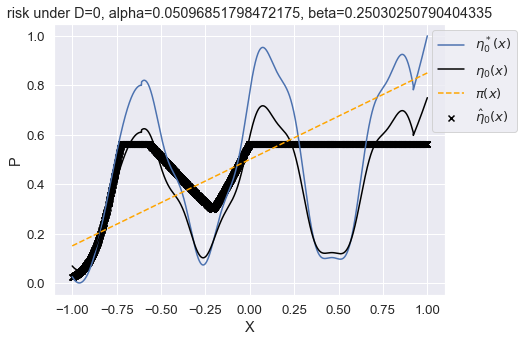

In [10]:
Y0_PDF = 'piecewise_sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'
do=0

expdf, _ = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
)
debug_info = {
    'val_x': cosl['x'].squeeze(),
    'val_py': cosl['py_hat'].squeeze()
}
# debug_info = {
#     'val_x': x,
#     'val_py': py_hat
# }
sns.set(font_scale=1.2)
viz_ccpe_estimates(expdf, debug_info, error_params[f'alpha_{do}'][0],
                   error_params[f'beta_{do}'][0], do, Y0_PDF, Y1_PDF, PI_PDF)

In [28]:
expdf, error_params = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    error_min=0.2,
    error_max=0.2, 
    shuffle=True
)

split_ix = int(expdf.shape[0]*.7)
train_df, val_df = expdf.iloc[:split_ix,:], expdf.iloc[split_ix:,:]


# Train model
train_loader, val_loader = get_loaders(train_df, val_df, do=0, target='Y0', conditional=True)
model = MLP()

surrogate_params = {
    'alpha': 0.2,
    'beta': 0.2
}

# surrogate_params = {
#     'alpha': None,
#     'beta': None
# }

losses = train(model, target='Y0', train_loader=train_loader, error_params=surrogate_params, n_epochs=40)

# Evaluate on validation data
x, y, py_hat = evaluate(model, val_loader)
y_hat = np.zeros_like(y)
y_hat[py_hat > .5] = 1

TypeError: generate_syn_data() got an unexpected keyword argument 'error_min'